# Feature Selection

In [2]:
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/')
%load_ext autoreload
%autoreload 2

In [16]:
import os
from src.misc import load_processed_dataset
import pandas as pd

# Market Indices
df = load_processed_dataset("aapl", "2018-01-01", "2023-01-1")
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'log_open', 'log_high', 'log_low', 'log_close', 'log_volume  ',
       'Close Forecast', 'close_t-1', 'close_t-2', 'close_t-3', 'close_t-4',
       'close_t-5', 'pct_change', 'log_return', 'dayofweek', 'quarter',
       'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear', 'upper_band',
       'middle_band', 'lower_band', 'SMA_3', 'SMA_5', 'SMA_10', 'SMA_20',
       'SMA_50', 'EMA_3', 'EMA_5', 'EMA_10', 'EMA_20', 'EMA_50', 'ADX',
       'aroon_down', 'aroon_up', 'macd', 'macdsignal', 'macdhist', 'RSI_14',
       'slow_k', 'slow_d', 'williams_r', 'AD', 'OBV', 'NATR', 'TRANGE',
       'fed_funds_rate', 'log_fed_funds_rate', '^N225', 'log_^N225', '^IXIC',
       'log_^IXIC', '^FTSE', 'log_^FTSE', '^SPX', 'log_^SPX', '^DJI',
       'log_^DJI'],
      dtype='object')

In [4]:
X = df.drop([x for x in df.columns if "Forecast" in x], axis=1)  # Features
y = df['Close Forecast']  # Target variable

## Filter Methods

Correlation Coefficient

<Axes: >

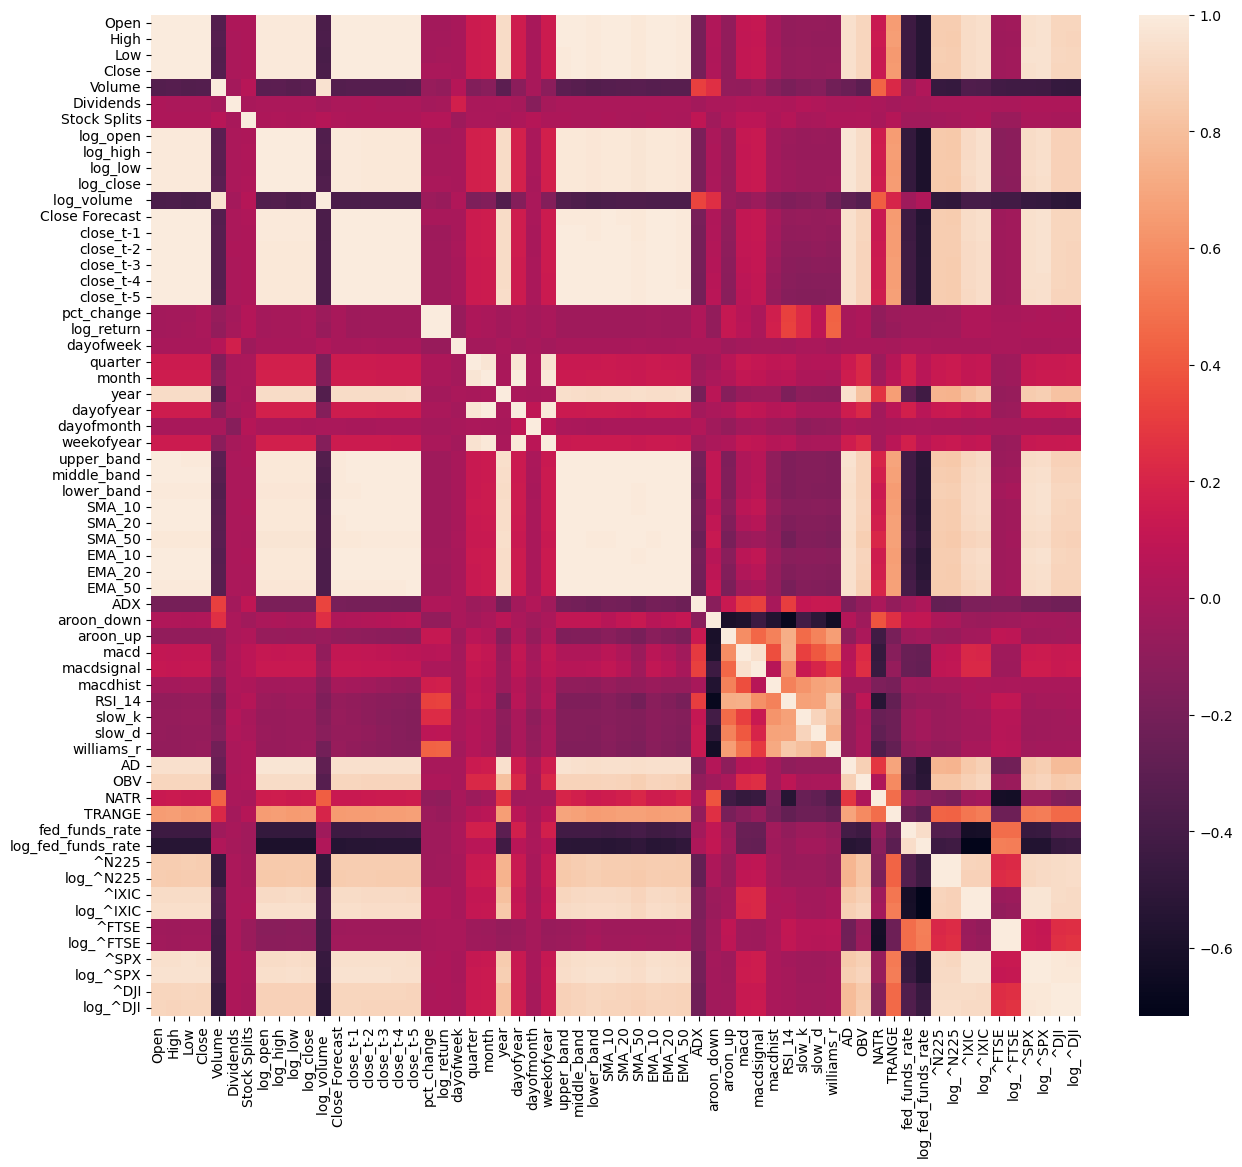

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(15, 13))  # Increase figure size
sns.heatmap(correlation_matrix, fmt=".2g")

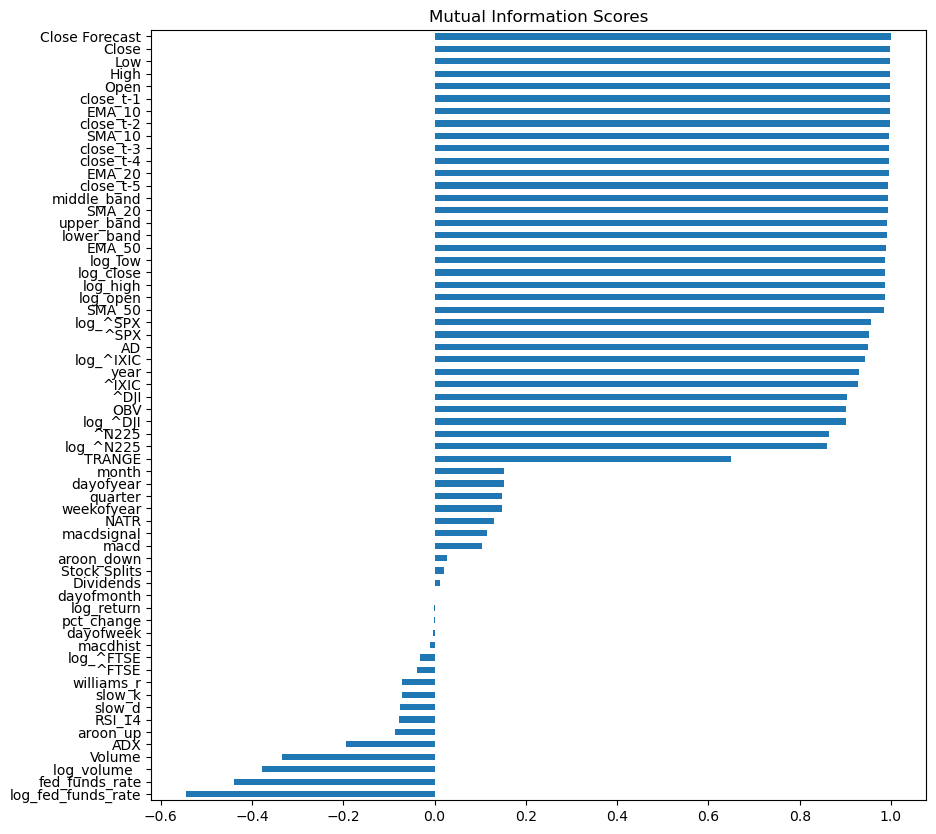

In [6]:
corr_values = correlation_matrix['Close Forecast'].sort_values(ascending=True)
corr_values.plot.barh(figsize=(10, 10))
plt.title('Mutual Information Scores')
plt.show()

Mutual Information

In [7]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import numpy as np

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=True)  # Sorting the scores

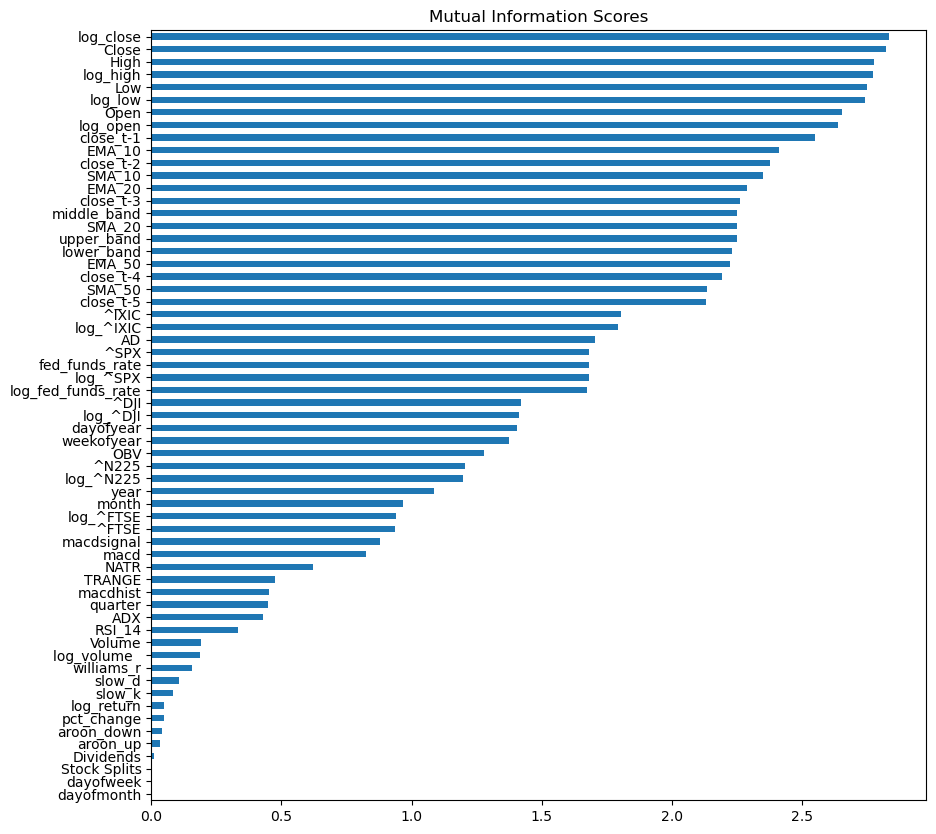

In [8]:
mi_scores.plot.barh(figsize=(10, 10))
plt.title('Mutual Information Scores')
plt.show()

## Wrapper Methods

Recursive Feature Elimination

In [22]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Select a model for feature ranking
model = RandomForestRegressor(n_estimators=100)

# RFE
selector = RFE(estimator=model, n_features_to_select=20, step=1)
selector = selector.fit(X, y)

# Selected Features
selected_features = selector.support_
selected_feature_names = X.columns[selected_features]
print("Selected features:", selected_feature_names.tolist())


Selected features: ['High', 'Close', 'log_low', 'log_close', 'middle_band', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'AD']


Sequential Feature Selection (SFS)

In [15]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Linear model for SFS
lr = LinearRegression()

# Forward SFS (set forward=True for forward selection)
sfs = SequentialFeatureSelector(lr, n_features_to_select=10, direction='forward')
sfs.fit(X, y)

# Selected Features
selected_features = sfs.get_support()
selected_feature_names = X.columns[selected_features]
print("Selected features:", selected_feature_names.tolist())

Selected features: ['Close', 'close_t-2', 'close_t-3', 'dayofweek', 'year', 'dayofmonth', 'aroon_down', 'williams_r', 'TRANGE', 'log_fed_funds_rate']


In [10]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

# Linear model for SFS
lr = LinearRegression()

# Forward SFS (set forward=True for forward selection)
sfs = SequentialFeatureSelector(lr, n_features_to_select=3, direction='backward')
sfs.fit(X, y)

# Selected Features
selected_features = sfs.get_support()
selected_feature_names = X.columns[selected_features]
print("Selected features:", selected_feature_names.tolist())

Selected features: ['Close', 'log_open', 'fed_funds_rate']


## Embedded Methods

LASSO (L1 Regularization)

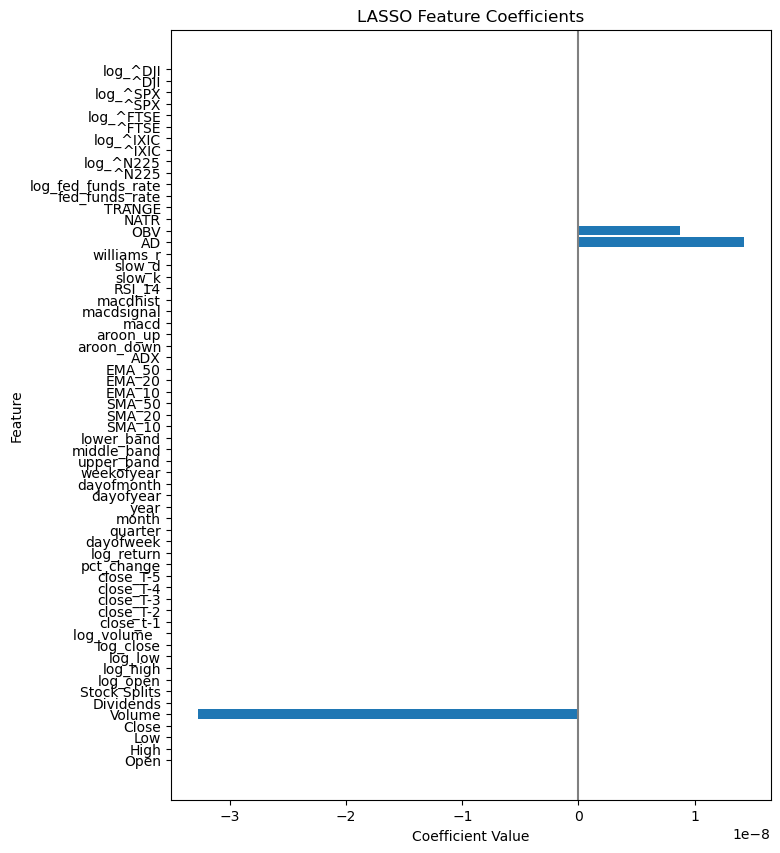

In [57]:
from sklearn.linear_model import LassoCV
import numpy as np

# LASSO with cross-validation to find the best alpha (regularization strength)
lasso = LassoCV(random_state=42).fit(X, y)

# Plot
plt.figure(figsize=(10, 10))
plt.barh(range(X.shape[1]), lasso.coef_, align='center')
plt.yticks(np.arange(X.shape[1]), X.columns)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("LASSO Feature Coefficients")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)
plt.show()


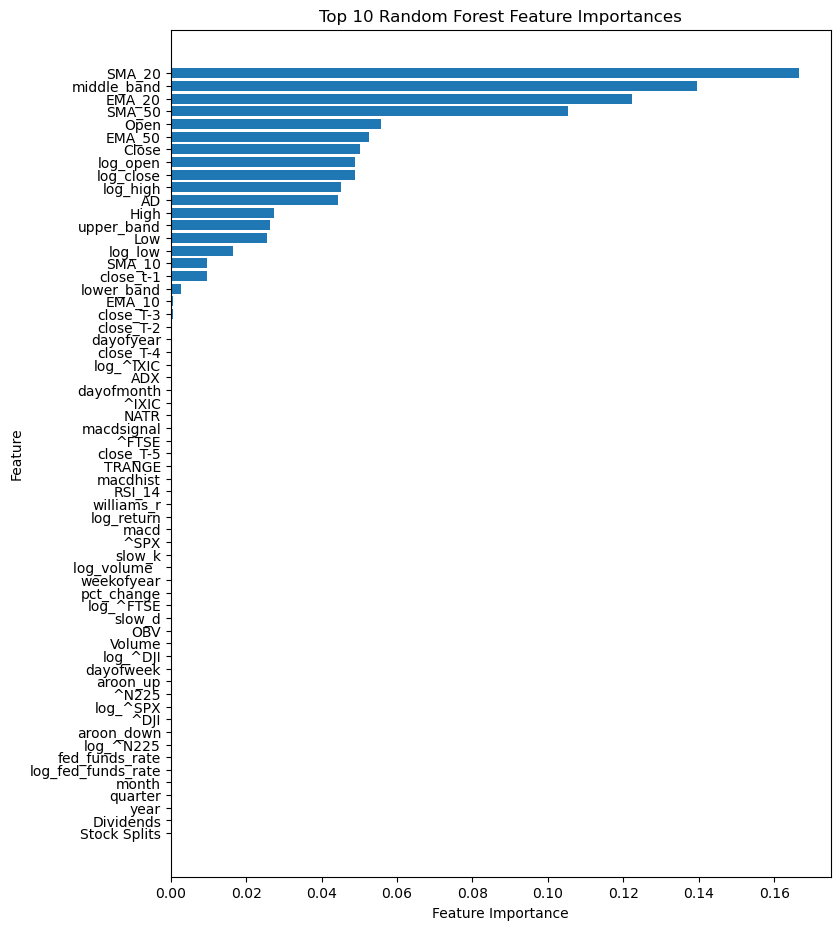

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# Random Forest for feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X, y)

# Feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top N features
N = len(X.columns)  # Number of top features to display
plt.figure(figsize=(11, 11))
plt.barh(range(N), importances[indices[:N]], align='center')
plt.yticks(np.arange(N), [X.columns[i] for i in indices[:N]])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Random Forest Feature Importances")
plt.subplots_adjust(left=0.3)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

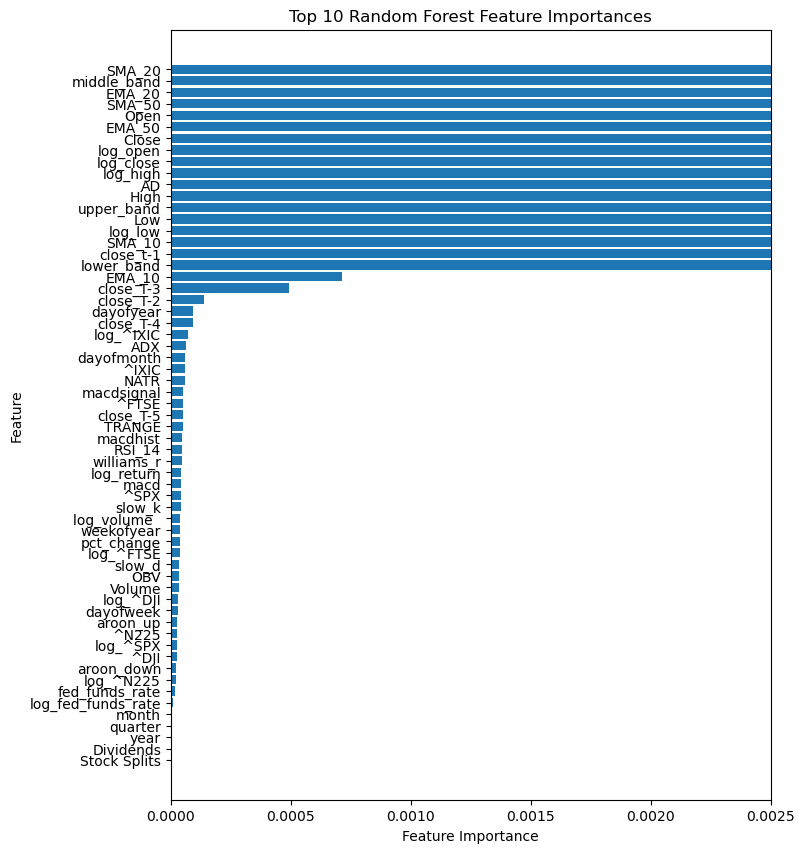

In [47]:
# Plot top N features
plt.figure(figsize=(10, 10))
plt.barh(range(N), importances[indices[:N]], align='center')
plt.yticks(np.arange(N), [X.columns[i] for i in indices[:N]])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Random Forest Feature Importances")
plt.subplots_adjust(left=0.3)
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.xlim(0,0.0025)
plt.show()